In [1]:
class backtest():
    
    def __init__(self, marketData, initCash = 100000): 
        self.position = 0
        self.cash = initCash
        self.tradecost = 0.001
        self.marketData = marketData['close']
        self.initCash = initCash
    
    def buy(self, tradeIter, stockNum):
        if stockNum == -1:
            stockNum = self.cash // self.marketData[tradeIter]
            stockNum -= stockNum % 100
            self.position += stockNum
            self.cash -= self.marketData[tradeIter] * stockNum * (1+self.tradecost)
            return
        
        if self.marketData[tradeIter] * stockNum * (1+self.tradecost) > self.cash:
            return ("No enough money!")
        else:
            self.position += stockNum
            self.cash -= self.marketData[tradeIter] * stockNum * (1+self.tradecost)
    
    def sell(self, tradeIter, stockNum):
        if stockNum == -1:
            stockNum = self.position
            self.position -= stockNum
            self.cash += self.marketData[tradeIter] * stockNum
            return
        
        if self.position < stockNum:
            return ("No enough position!")
        else:
            self.position -= stockNum
            self.cash += self.marketData[tradeIter] * stockNum
            return
            
    def getTotalAssets(self, tradeIter):
        return self.marketData[tradeIter] * self.position + self.cash
    
    def getTotalPosition(self):
        return self.position

    def plot(self, assetsList):
        colors = ['#A1A9D0', '#F0988C', '#B883D4', '#9E9E9E']
        priceListRate = [x/self.marketData[0] - 1 for x in self.marketData]
        plt.figure(figsize = (20,6),dpi=200)
        plt.ylim([-3,3])
        
        assetsListRate = [x/self.initCash - 1 for x in assetsList[0]]
        plt.plot(assetsListRate,label = 'alpha191', color = colors[0])
        
        assetsListRate = [x/self.initCash - 1 for x in assetsList[1]]
        plt.plot(assetsListRate,label = 'alpha191+Emotion factor', color = colors[1])
        
        assetsListRate = [x/self.initCash - 1 for x in assetsList[2]]
        plt.plot(assetsListRate,label = 'Emotion factor', color = colors[2])
        
        
        plt.plot(priceListRate, label = 'Price(buy-and-hold)')
            
        plt.legend(fontsize = 15)
        plt.xlabel('day')
        plt.ylabel('return')
        #plt.twinx()
        #plt.ylim([1000,80000])
        #plt.bar(range(len(positionList)), positionList, label = 'Position')
        #plt.legend(loc='upper center')
        plt.title('BackTest Result', fontsize = 15)
        plt.grid()
        plt.savefig('backtest.png', pad_inches=0.0, dpi = 600, bbox_inches = 'tight')
        plt.show()
        
        

    

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

dt = pd.read_csv('data/dt_emotion.csv')
emotionListDayly = dt.groupby('fulltime').agg('mean')['enmotionValue'][2:]

priceList = pd.read_csv("data/dt_300059.csv")
withEmotion = pd.merge(emotionListDayly,priceList, left_on='fulltime', right_on = 'time')[['enmotionValue','close','time','cumsumpc']]
withEmotion.corr()
withEmotion['time'] = pd.to_datetime(withEmotion['time'])
withEmotion = withEmotion.sort_values(by = 'time').reset_index(drop=True)
import pandas as pd
dt_e = pd.read_csv('data/dt_emotion.csv')
emotionListDayly = dt_e.groupby('fulltime').agg('mean')['enmotionValue'][2:]
dt = pd.read_csv('data/FactorandPrice.csv')
dt_nona = dt.dropna(axis=1, how = 'any')
dt_nona = pd.merge(dt_nona, emotionListDayly, left_on = 'time', right_on = 'fulltime')


/tmp/ipykernel_261/346146160.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv('data/dt_emotion.csv')
/tmp/ipykernel_261/346146160.py:13: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dt_e = pd.read_csv('data/dt_emotion.csv')


/root/miniconda3/lib/python3.8/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


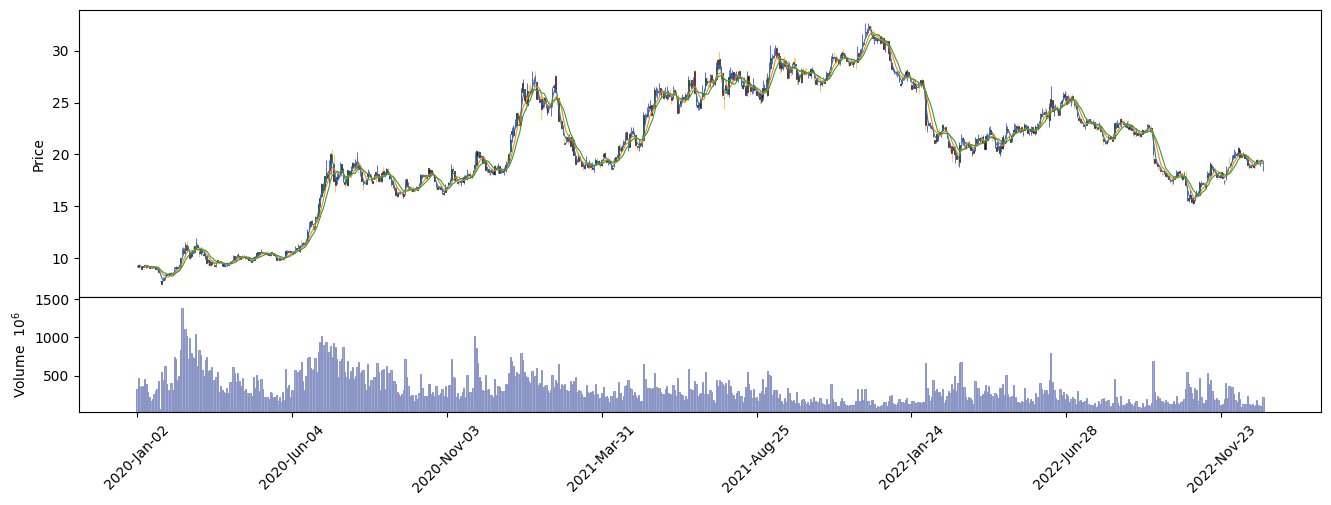

AttributeError: module 'mplfinance' has no attribute 'savefig'

In [25]:
import mplfinance as mpf
#plt.figure(figsize = (120,30), dpi = 400)
market_colors = mpf.make_marketcolors(up= 'green' , down= 'red' , 
                                      edge= 'black' , 
                                      wick={ 'up' : 'blue' , 'down' : 'orange' }, 
                                      volume= '#A1A9D0' , 
                                      ohlc= 'black' ) 
my_style = mpf.make_mpf_style(marketcolors=market_colors) 
dt_plot = dt_nona.iloc[9:]
dt_format = pd.DataFrame({'Date':pd.to_datetime(dt_plot['time']), 'Open':dt_plot['open'], 'High':dt_plot['high'], 'Low':dt_plot['low'], 'Close':dt_plot['close'], 'Volume':dt_plot['volume']})
dt_format = dt_format.set_index('Date')
mpf.plot(dt_format, type='candle',mav=(3,6,9), volume=True, style = my_style, figratio=(30,10))
mpf.savefig('trade.png')

In [ ]:
import matplotlib.pyplot as plt

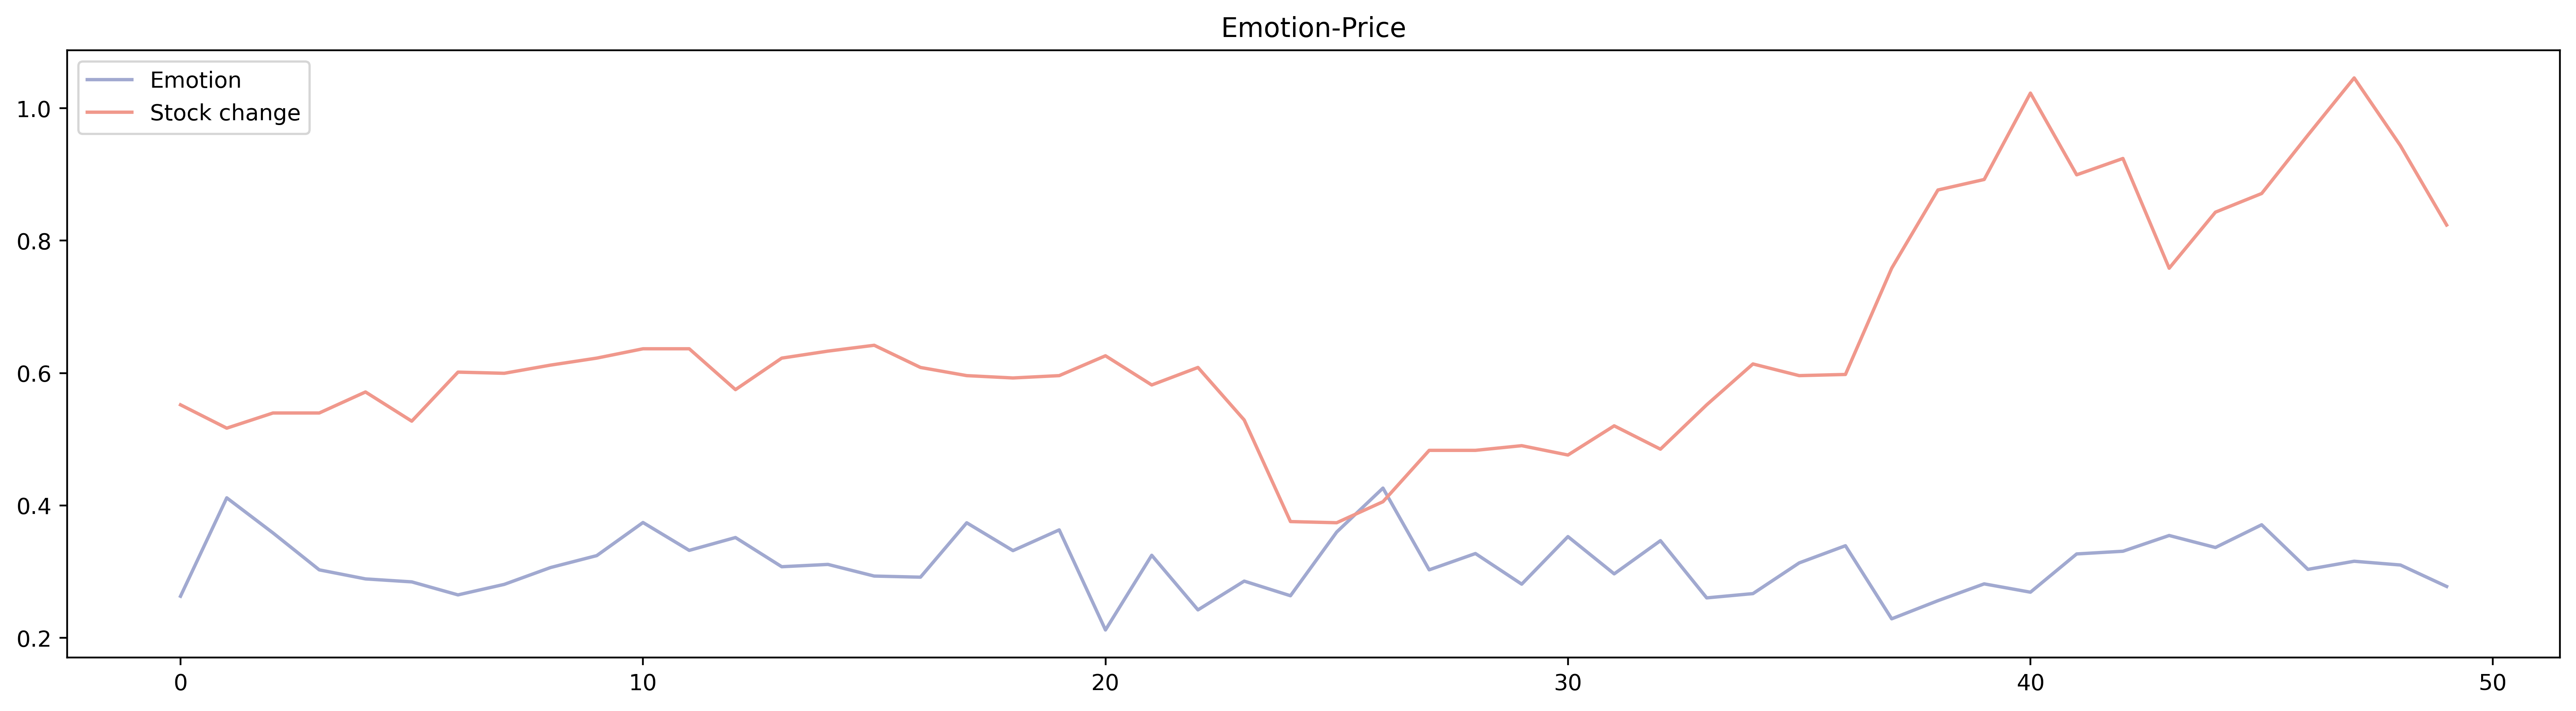

In [20]:
colors = ['#A1A9D0', '#F0988C', '#B883D4', '#9E9E9E']
plt.figure(figsize = (20, 5), dpi = 400)
plt.plot(withEmotion.iloc[:50]['enmotionValue'], color = colors[0], label = 'Emotion')
plt.plot(withEmotion.iloc[:50]['cumsumpc'] - 1, color = colors[1], label = 'Stock change')
plt.title('Emotion-Price')
plt.legend()
plt.savefig('emotion-price.png')

In [16]:
withEmotion.corr()

,enmotionValue,close,cumsumpc
enmotionValue,1.000000,-0.171734,-0.171734
close,-0.171734,1.000000,1.000000
cumsumpc,-0.171734,1.000000,1.000000


In [23]:
withEmotion

,enmotionValue,close,time,cumsumpc
0,0.262857,8.80,2019-12-20,1.552028
1,0.411523,8.60,2019-12-23,1.516755
2,0.358491,8.73,2019-12-24,1.539683
3,0.302703,8.73,2019-12-25,1.539683
4,0.289037,8.91,2019-12-26,1.571429
...,...,...,...,...
732,0.311594,19.45,2022-12-27,3.430335
733,0.358491,19.32,2022-12-28,3.407407
734,0.266187,19.37,2022-12-29,3.416226
735,0.353448,19.40,2022-12-30,3.421517


<AxesSubplot:>

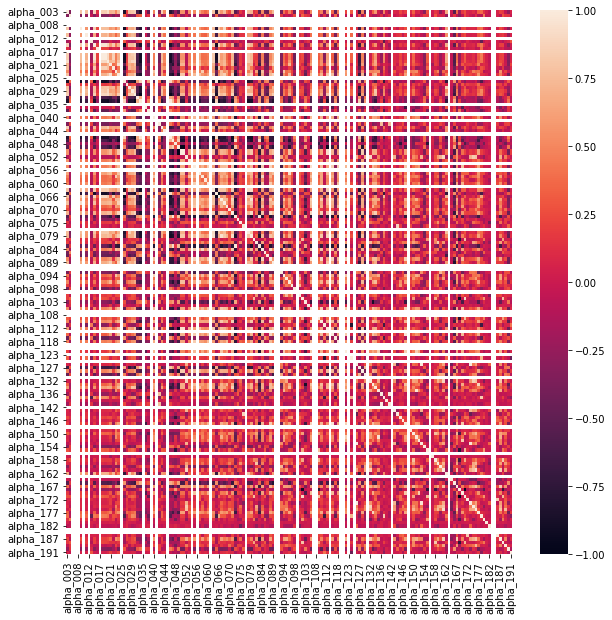

In [39]:
import seaborn
plt.figure(figsize = (10,10))
seaborn.heatmap(X.corr())

0      1.552028
1      1.516755
2      1.539683
3      1.539683
4      1.571429
         ...   
564    3.430335
565    3.407407
566    3.416226
567    3.421517
736    3.398589
Name: cumsumpc, Length: 737, dtype: float64

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
np.random.seed(9876789)



y = dt_nona['cgpc_avg5']
X = dt_nona.drop(['Unnamed: 0', 'time', 'open', 'close', 'high', 'low', 'volume', 'money','cgpc','cgpc_avg5','enmotionValue'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
res = results.predict()
len(withEmotion)

                            OLS Regression Results                            
Dep. Variable:              cgpc_avg5   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     7.451
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           5.66e-66
Time:                        14:39:59   Log-Likelihood:                 2482.0
No. Observations:                 737   AIC:                            -4714.
Df Residuals:                     612   BIC:                            -4139.
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha_003      0.0015      0.001      1.410      0.1

737

737

In [93]:
np.percentile(res, 2)

-0.019164181400691132

In [111]:
X = [dt_nona['enmotionValue'],res]

X = np.array(X).T
y = dt_nona['cgpc_avg5']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
res = results.predict()

                                 OLS Regression Results                                
Dep. Variable:              cgpc_avg5   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.606
Method:                 Least Squares   F-statistic:                              567.0
Date:                Sun, 05 Mar 2023   Prob (F-statistic):                   1.10e-149
Time:                        13:25:03   Log-Likelihood:                          2482.0
No. Observations:                 737   AIC:                                     -4960.
Df Residuals:                     735   BIC:                                     -4951.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,enmotionValue,close,time,cumsumpc
136,0.325077,10.01,2020-04-22,1.765432
137,0.352740,9.85,2020-04-23,1.737213
138,0.400568,9.67,2020-04-24,1.705467
139,0.372822,9.61,2020-04-27,1.694885
140,0.328205,9.91,2020-04-28,1.747795
...,...,...,...,...
564,0.311594,19.45,2022-12-27,3.430335
565,0.358491,19.32,2022-12-28,3.407407
566,0.266187,19.37,2022-12-29,3.416226
567,0.353448,19.40,2022-12-30,3.421517


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
assetsList = []
positionList = []

backtester = backtest(withEmotion)

for i in tqdm(range(len(withEmotion))):
    if res[i] > np.percentile(res, 95):
        backtester.buy(i, 1000)
    elif res[i] < np.percentile(res, 5):
        backtester.sell(i, 500)
        
    # backtester.buy(i,random.randint(0, 100)*100)
    # backtester.sell(i,random.randint(0, 100)*100)
    
    assetsList.append(backtester.getTotalAssets(i))
    positionList.append(backtester.getTotalPosition())
    


100%|██████████| 737/737 [00:00<00:00, 2138.52it/s]


In [62]:
assetsList_3 = assetsList

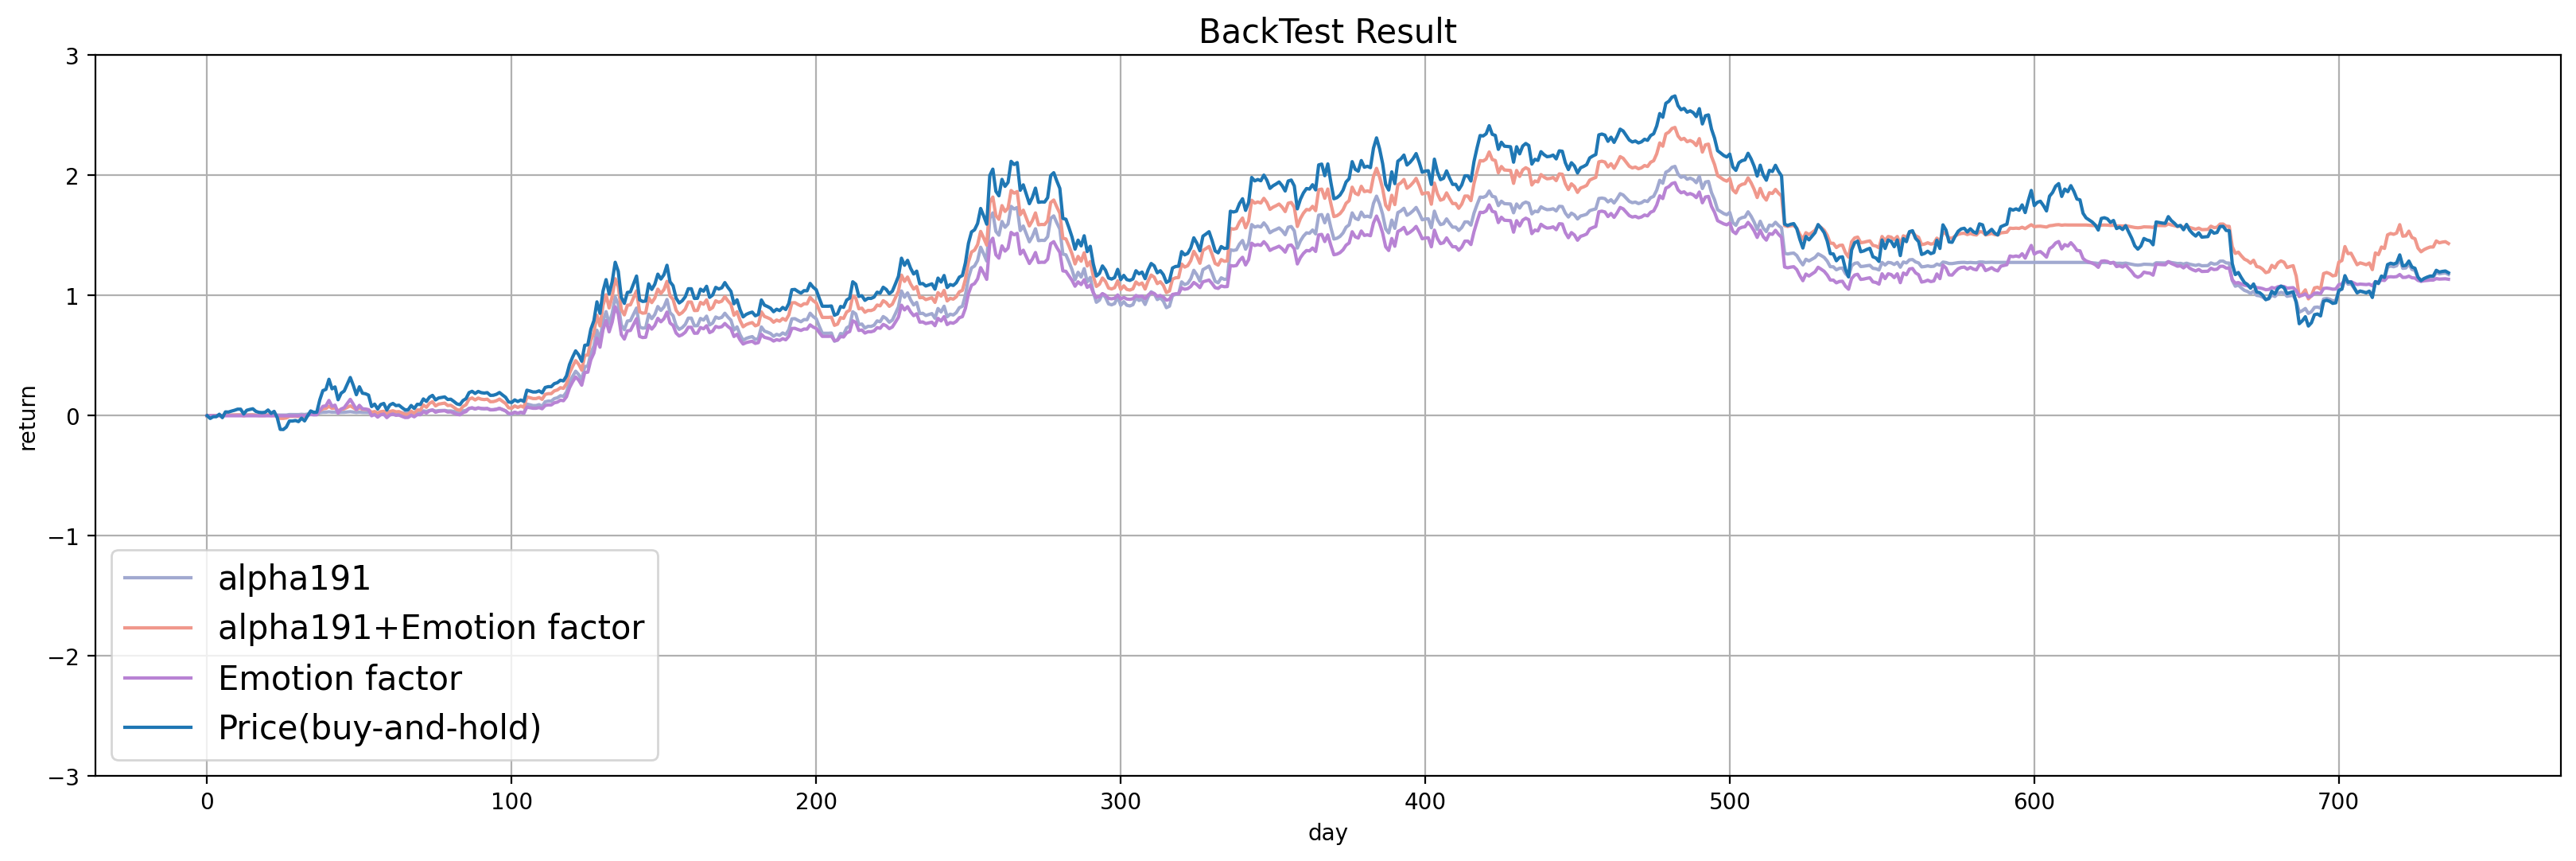

In [96]:
backtester = backtest(withEmotion)
assetsList = [assetsList_1,assetsList_2,assetsList_3]
backtester.plot(assetsList)


In [97]:
def cal_back(arr):
    max_back = 0
    for i in range(len(arr)):
        for j in range(i, len(arr)):
            if arr[j] - arr[i] < 0 and arr[j] - arr[i] < max_back:
                max_back = arr[j] - arr[i]
    return max_back

def cal_sharp(dt):
    return (((dt[-1]-100000)/100000)/737*252-0.028)/(np.std(np.diff(dt)/dt[:-1])*((252)**0.5))

In [107]:
priceListRate = [x/withEmotion['close'][0] - 1 for x in withEmotion['close']]

In [108]:
nameList = ['alpha191','alpha191+Emotion', 'Emotion']
k = 0

print('back: {}'.format(cal_back(priceListRate)), nameList[k])
print('return: {}'.format(priceListRate[-1]), nameList[k])
print('max: {}'.format(max(priceListRate)))
k+=1

back: -1.9147727272727273 alpha191
return: 1.189772727272727 alpha191
max: 2.661363636363636
